# Proyecto análisis de conversación de mensajería

## Cargar datos
- Exportar una conversación personal o grupal de Whastapp o Telegram en un formato adecuado (JSON, CSV, etc), no exportar audios, archivos multimedia, etc
- Importar archivo y convertirlo en dataframe

In [24]:
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Leer csv
df = pd.read_json('../data/result.json')

df

,name,type,id,messages
0,Base de datos II 2021,private_group,487588276,"{'id': 21639, 'type': 'service', 'date': '2021..."
1,Base de datos II 2021,private_group,487588276,"{'id': 21647, 'type': 'message', 'date': '2021..."
2,Base de datos II 2021,private_group,487588276,"{'id': 21648, 'type': 'message', 'date': '2021..."
3,Base de datos II 2021,private_group,487588276,"{'id': 21652, 'type': 'message', 'date': '2021..."
4,Base de datos II 2021,private_group,487588276,"{'id': 21656, 'type': 'message', 'date': '2021..."
5,Base de datos II 2021,private_group,487588276,"{'id': 21657, 'type': 'message', 'date': '2021..."
6,Base de datos II 2021,private_group,487588276,"{'id': 21659, 'type': 'service', 'date': '2021..."
7,Base de datos II 2021,private_group,487588276,"{'id': 21665, 'type': 'message', 'date': '2021..."
8,Base de datos II 2021,private_group,487588276,"{'id': 21674, 'type': 'message', 'date': '2021..."
9,Base de datos II 2021,private_group,487588276,"{'id': 21677, 'type': 'message', 'date': '2021..."


## Conocer los datos

- Observar que tipo de datos tiene el dataframe y que tipo de valores tiene
- Explicar que significa cada campo y que tipo de acciones quedan registradas

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      53 non-null     object
 1   type      53 non-null     object
 2   id        53 non-null     int64 
 3   messages  53 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.8+ KB


Name: Nombre del grupo de telegram en este caso es "Base de datos II 2021"
Type: Especifica que es un grupo privado "private_group"
Id: Numero de identificacion del grupo que en este caso es "487588276"
Messages: Lista con diccionarios con todos los usuarios donde se pueden ver los siguientes campos dentro del diccionario:
"id": Representa el ID del usuario en el grupo ejemplo: "21639"
"type": Puede ser: "service" o "message
"date": Fecha en la que ocurrio el evento ejemplo:"2021-08-09T17:34:53"
"actor": Nombre del usuario que tiene en Telegram ejemplo "Lautaro G"
"actor_id": El ID del usuario de Telegram: "user858971037"
"action": La accion que ocurrio en el grupo "join_group_by_link"
"text": mensaje que se envia ""

## Datos faltantes

- Analizar de manera visual y no visual si existen datos faltantes

In [26]:
missing = []
for column in df.columns:
    attribute = {}
    attribute["column"] = column
    # Obtener promedio de valores nulos para la columna
    attribute["percentage"] = np.mean(df[column].isnull())*100
    # Obtener cantidad de valores nulos para la columna
    attribute["quantity"] = np.sum(df[column].isnull())
    missing.append(attribute)  

# Convertir lista de diccionarios en dataframe
missing_df = pd.DataFrame(missing)

missing_df

,column,percentage,quantity
0,name,0.0,0
1,type,0.0,0
2,id,0.0,0
3,messages,0.0,0


- Tratar datos faltantes en el caso que los haya
- Explicar qué método se utilizó y por qué

No se encontraron datos faltantes asi que no hay necesidad de explicar que metodos se utilizo.

## Outliers

- Analizar de manera visual y no visual si existen valores atípicos para cada valor no categórico

In [27]:
df.describe()

,id
count,53.0
mean,487588276.0
std,0.0
min,487588276.0
25%,487588276.0
50%,487588276.0
75%,487588276.0
max,487588276.0


In [28]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id    0.0
dtype: float64


Se toma el valor entre el tercer y el primer cuartil de la distribucion

IQR = Se asume que cualquier valor fuera de este rango es un valor atipico

In [29]:
lower_rank = Q1 - 1.5 * IQR
upper_rank = Q3 + 1.5 * IQR

In [30]:
print("Top rank")
print(lower_rank)
print("Lower range")
print(upper_rank)

Top rank
id    487588276.0
dtype: float64
Lower range
id    487588276.0
dtype: float64


In [31]:
df_outliers = (df < lower_rank) | (df > upper_rank)
df_outliers

<ipython-input-31-1d353dc7bd2f>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outliers = (df < lower_rank) | (df > upper_rank)
<ipython-input-31-1d353dc7bd2f>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outliers = (df < lower_rank) | (df > upper_rank)


,id,messages,name,type
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


<AxesSubplot:>

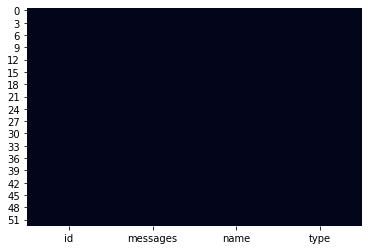

In [32]:
sns.heatmap(df_outliers, cbar=False)

- Si existen valores atípicos, ¿estos son causados por errores en la carga de datos o por otra razón?. Explicar la razón

No se encontraron valores atipicos en el Json